## Building a Neural Network from Scratch

Let's consider a binary classification model, dataset, with two features x1 and x2 and a label y of either 0 or 1. The task of this model would be to correctly predict the label. Though this is not a perfect model in any sense, we would just implement it, to figure out how a neural network works. We would follow a very primitive approach here, without even involving the complexities of matrices

Let's look at the structure of a model which we are going to implement in this notebook.

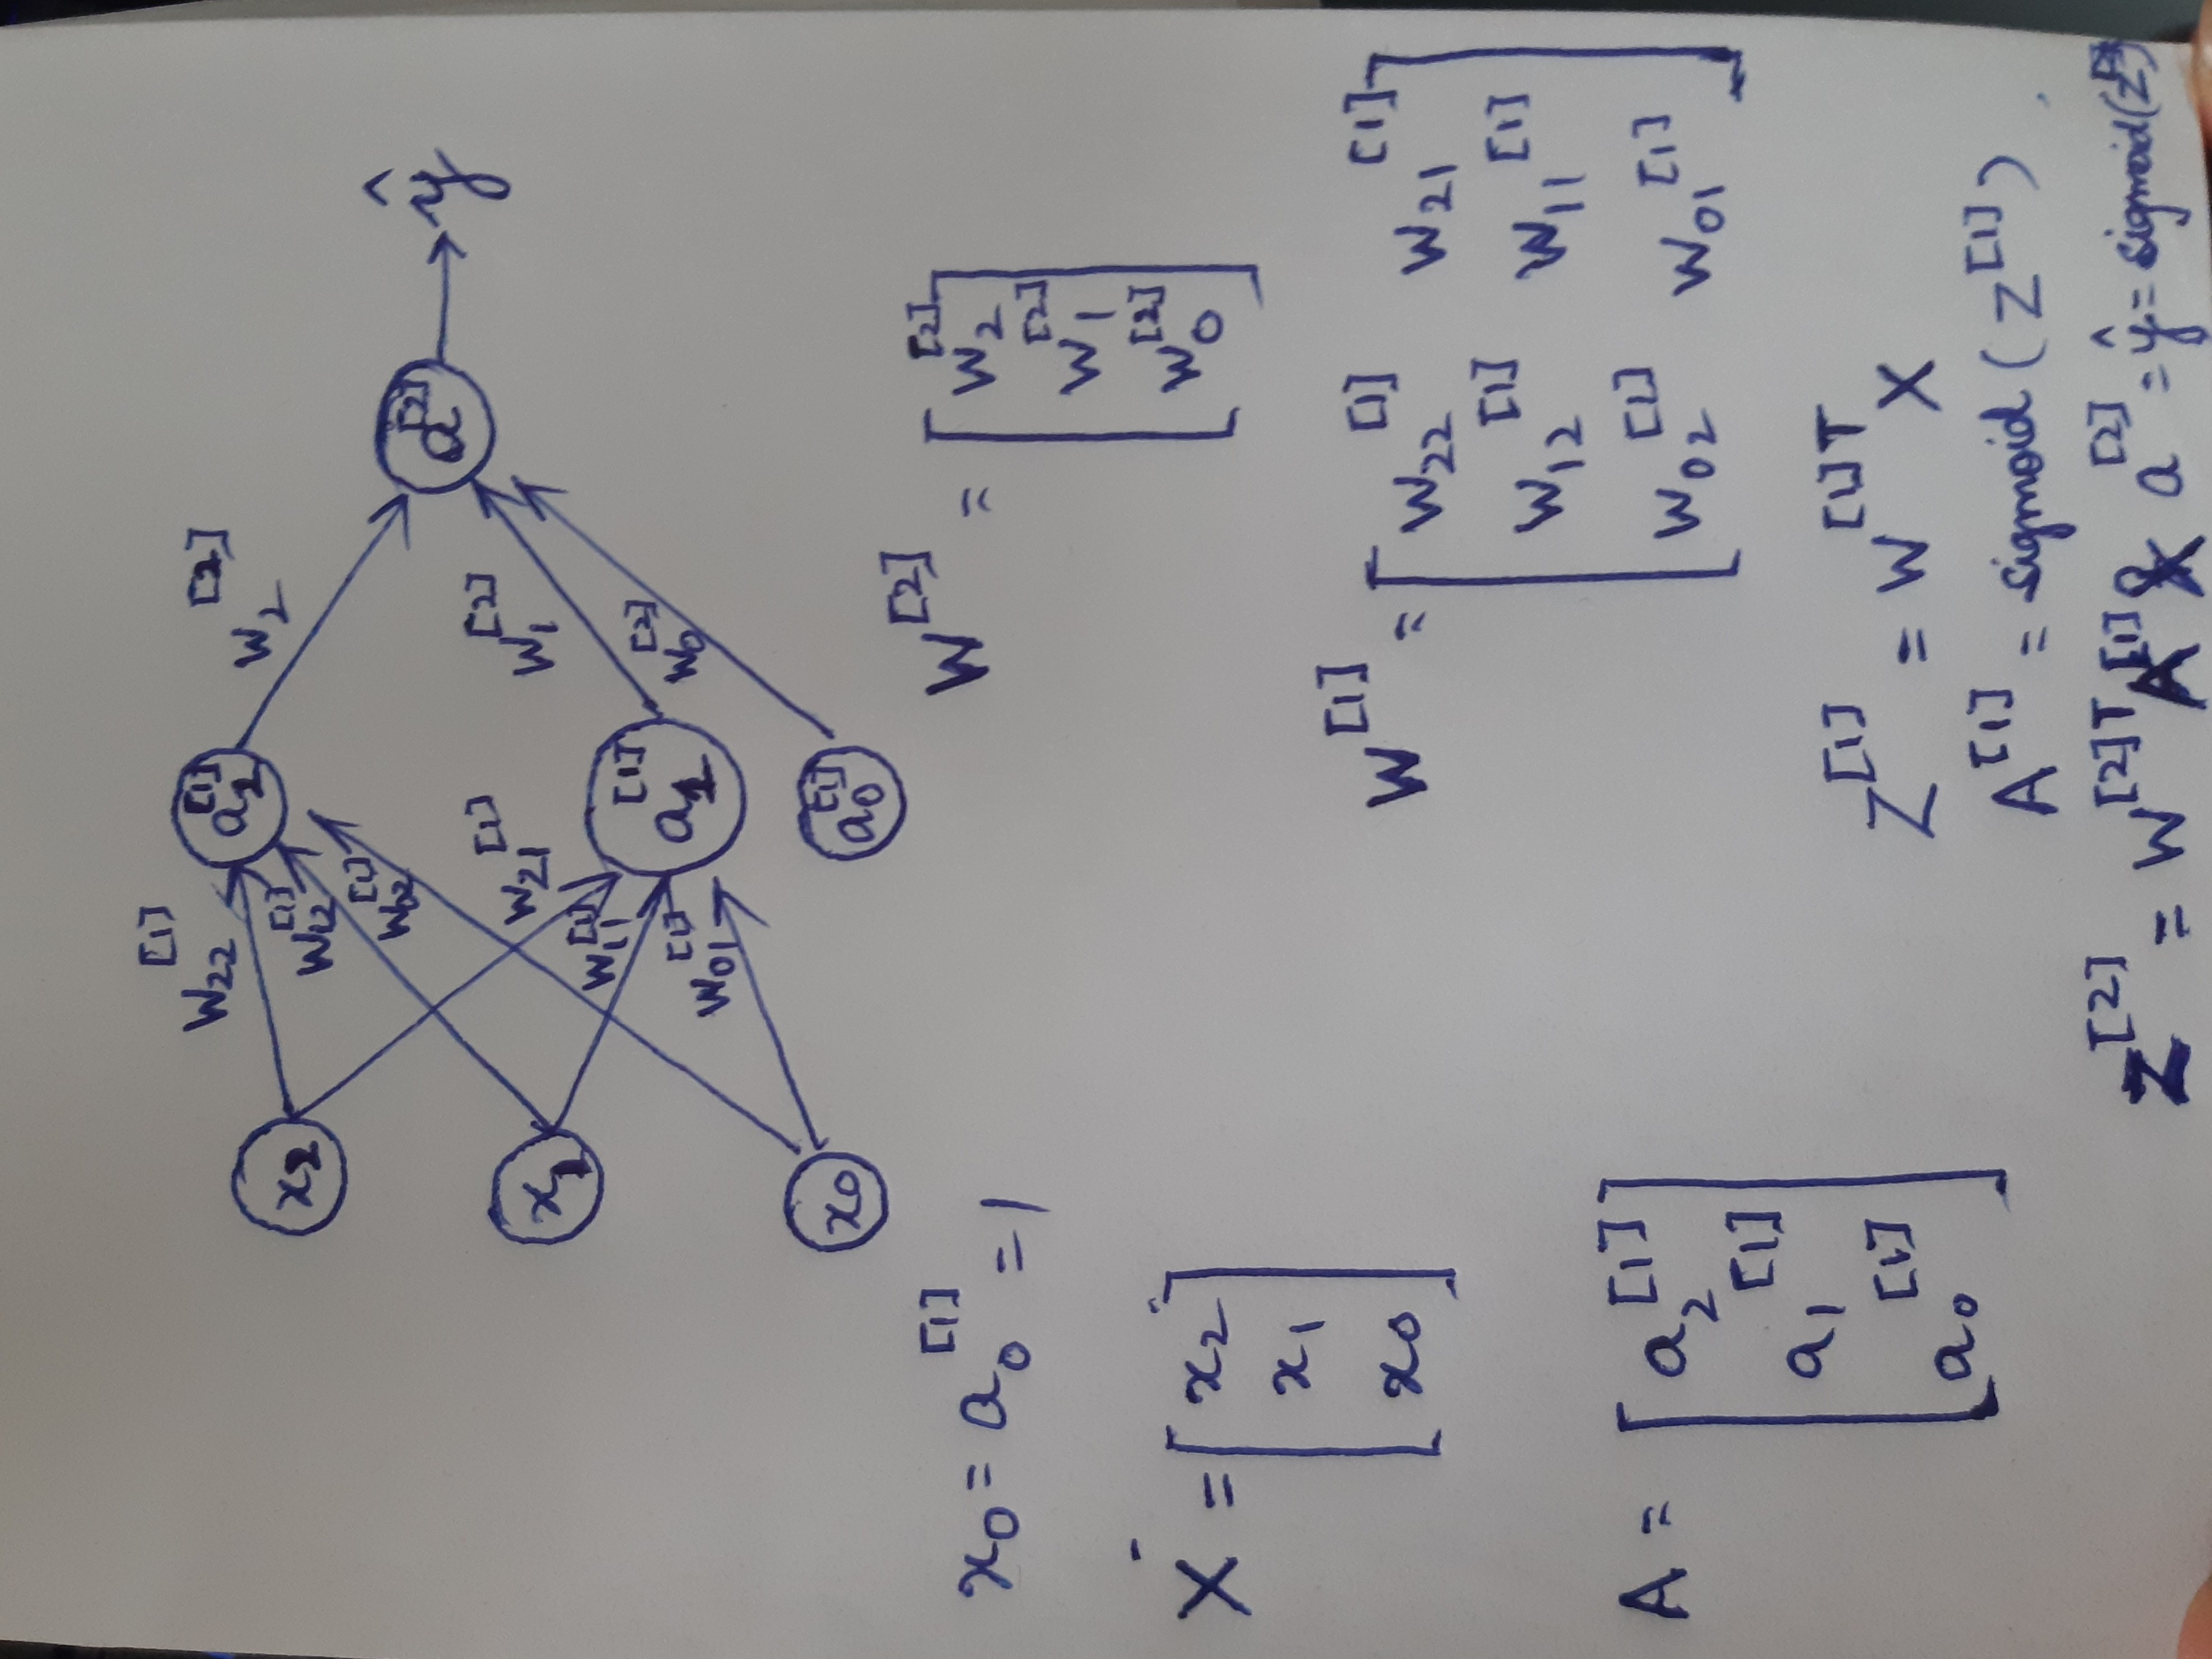

In [60]:
Image(filename='images/rotated.jpg')

Let's note some details. This is the general way in which the equations are represented in matrix form. The superscript represents the layer number. The terms x0 and a0 are given to be 1, to incorporate the bias terms into a single matrix multiplication, instead of having b (bias) terms separately. Also the weights matrix for each layer is written in a single matrix form, such that the multiplication yields appropriate equations. Ponder over these expressions, and try to expand them to get a clear idea of how these matrices are written

Now, let's look at some of the details specific to this task. We would be generating a dataset with 200 instances. We would try to club these into a single matrix, keeping with our aim of simplifying equations. So, we would write these instances as different columns of the X and y matrix. So each of X and y matrices would have 200 columns. In turn, matrix A will also hae 200 columns. Note that these are not shown in the above image, where we have only considered a single instance.

***Let's now proceed with the implementation part***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn 
from sklearn import datasets

In [2]:
def sigmoid(x):                    # Function which returns the pointwise sigmoid of a np array
    result=1/(1+np.exp(-x))
    return result

In [3]:
def inputlayer(X):                 # Function which adds the x0 element to the Input array X
    
        newrow = np.full((1,200),1)
        X=np.vstack([X,newrow])
        
        return X        
    

In [4]:
def hiddenlayer(W1,X):             # This is the hidden layer, and this function does the job associated with it
        

        #print(np.shape(X))
        Z = np.dot(W1.T,X)
        A=sigmoid(Z)
        
        newrow = np.full((1,200),1)
        A=np.vstack([A,newrow])        ''' Note that here as well we are adding the element a0 to the array A, 
                                     to all the columns, as each of these instance needs a bias term '''
        
        return A

In [5]:
def outputlayer(W2,A):              # This function performs the role of the output layer
    
        Z=np.dot(W2.T,A)
        y_pred=sigmoid(Z)
        
        return y_pred

##### Choosing the Loss Function

Since the activation function is non-linear, we do not use mean squared error as the loss function. This is because, in such case, we would get a non-convex cost function curve, with multiple local minimas, thus making it highly unlikely for the training to converge. So, the loss function which we use for such cases,(classification problems), is called as **cross-entropy**.

The formula for the cross entropy cost function is : (where m is the number of samples)

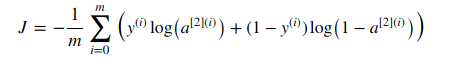

In [6]:
Image(filename='crossentropy.png')

In [ ]:
def loss_function(y,y_pred,m):    # This function defines the loss and cost function
    
    losses = np.multiply(np.log(y_pred), y) + np.multiply((1 - y), np.log(1 - y_pred))
    costs= - np.sum(logprobs) / m
    

For backpropagation, we need to find the derivative of the cost function w.r.t the weights. For this we would use the below given formulas. These can be derived by expanding out the matrices and trying to condense them, and is worth giving a shot. We would not be deriving it here

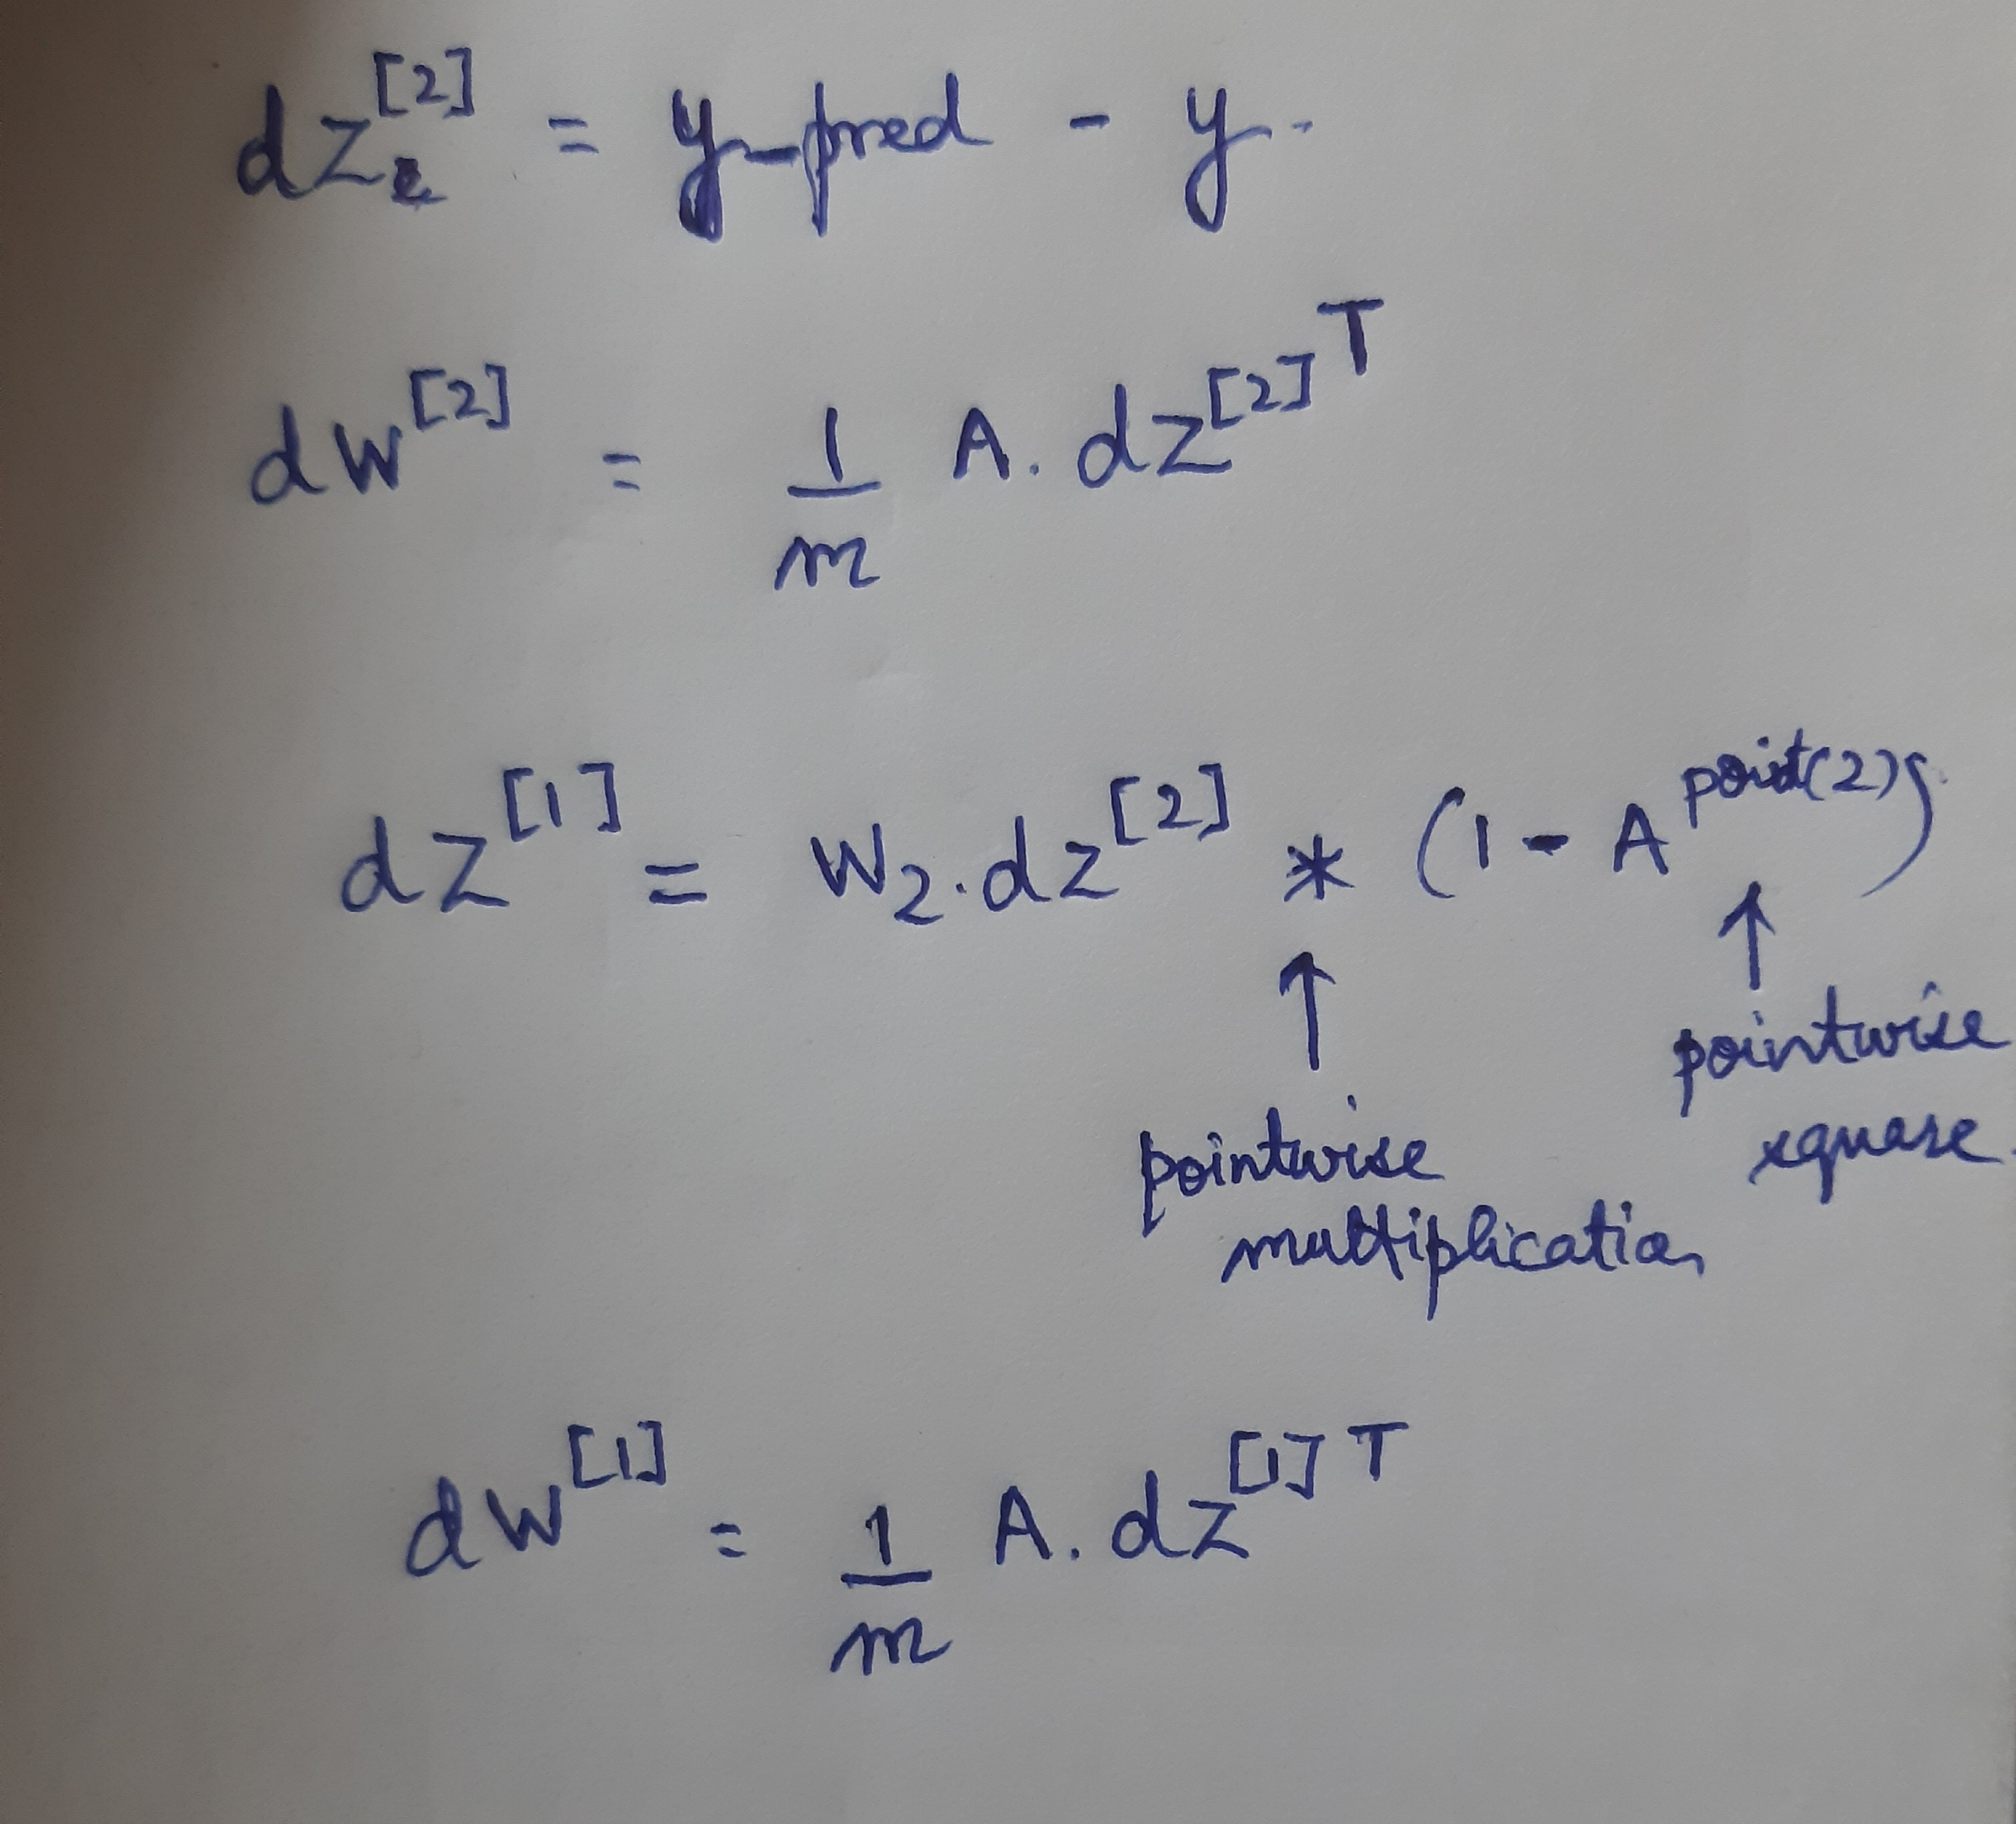

In [61]:
Image(filename='images/20200602_013833.jpg')

**Note** that however there is a slight issue in moving from dZ1 to dW1 in the above equations, because of the addition of additional terms to incorporate the bias. For the same, we would have to drop the last row in dZ1 before proceeding to computing dW1 as per the above formula. Think hard on this, and try to convince yourself. We would release a detailed explanation on this shortly.

In [45]:
def backprop(X,y,A,y_pred,W1,W2):  # Function to perform backpropagation
    n_epochs=10 # Number of epochs, i.e., the number of times we would go through the entire dataset while training
    
    learning_rate=0.1  # the learning rate of the training process
    
    m=200 # number of samples
    
    for i in range(0,n_epochs):   
      
        dZ2 = y_pred - y                
        
        dW2 = (1 / m) * np.dot(A, dZ2.T)   # The partial derivative of the cost function w.r.t. 
        
        dZ1 = np.multiply(np.dot(W2, dZ2), 1 - np.power(A, 2))    
        dZ1 = np.delete(dZ1,2,0)   # Dropping the last row which won't be required in the further procedure, because it just represents 1s of the bias term
                
        dW1 = (1 / m) * np.dot(X, dZ1.T)
        
        
        # Updating the weights as per Gradient Descent algorithm
        
        W2 = W2 - learning_rate * dW2

        W1 = W1 - learning_rate * dW1
        
        X=np.delete(X,2,0)  ## We need to remove the additional rows in X and A since calling inputlayer(), hiddenlayer() will add these terms which are required for incorporating the bias term
        A=np.delete(A,2,0)
        
        X=inputlayer(X)
        A=hiddenlayer(W1,X)
        y_pred=outputlayer(W2,A)       
        

In [46]:
def train(X,y):
        
        W1=np.random.rand(3,2) #### initialising random weight matrices
        W2=np.random.rand(3,1)
        
        X=inputlayer(X)            # calling the input layer 
        A=hiddenlayer(W1,X)        # calling the hidden layer

        y_pred=outputlayer(W2,A)   # calling the output layer to generate the predicted value of y for using the above initialised weights
        
        backprop(X,y,A,y_pred,W1,W2)  # Training the model using the backpropagation algorithm defined above
        
        
        return W1,W2

In [59]:
def predict(W1,W2,X_pred):    # Function to find the predicted value
    
    
        # We would follow the same procedure to find the predicted output, using the learned weights
        
        newrow = np.full((1,1),1)
        X_pred=np.vstack([X_pred,newrow])
        
        z1=np.dot(W1.T,X_pred)
        A1=sigmoid(z1)
        
        newrow = np.full((1,1),1)
        A1=np.vstack([A1,newrow])
        
        z2=np.dot(W2.T,A1)
        a2=sigmoid(z2)
        
        # The final prediction is made based on whether the predicted value of a2 is greater than or less than 0.5, more or less similar to logistic regression
        
        if(a2>=0.5):
            
            y_pred=1
            
        else:
            y_pred=0
        
        return y_pred

In [57]:
def main(x_predict):
    
        # Creating a random dataset with two features and a label 0 or 1
        
        np.random.seed(0)
        X,y=sklearn.datasets.make_moons(200,noise=0.2)
        
        X=X.T

        W1,W2 = train(X,y)
        y_predict=predict(W1,W2,x_predict)
        
        return y_predict

In [58]:
x_predict = np.array([[10],[0]])  # Finding the prediction for x_predict, i.e., with the features x1=2 and x2=2
main(x_predict)                  # Returns the predicted value of y

1

Well, there are many issues with the model which we have developed. By no means can we think that the result given by it is correct. We have just implemented it as a toy model. Also we have a very small dataset, which is ideally not suited to neural networks. Also we have only trained for 10 epochs without even bothering to check if the cost has converged.

For such classification problems, the final layer generally contains number of neurons equal to the number of classes. That is, the output has number of columns equal to the number of classes in the classification problem. The true output is one-hot encoded to a vector of this dimension. One generally uses the **Softmax Activation Function**, in the final layer, which gives a probability distribution, which the value corresponding to each column being the probability that the particular instance lies in that class. (The sum of these values is 1). 

Still, through this notebook, you would have got a clear idea of how neural networks function, and we would look more at how they could be developed in further notebooks.

We would keep implementation using Softmax activation as the **Task for today**. Try **implementing the same model using a softmax activation layer**, and make the associated changes to the different matrices in order to implement it. Also try tweaking the number of hidden layers and the number of neurons in each of these layers in order to build a more accurate model